This Notebook is created to analyse given Plume data.
-

prop_20160611_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160611_micro_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20150606_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20150609_c_mask_100c_mark_200_cf2_mf1.pkl

slim_prop_20160830_c_mask_100c_mark_200_cf2_mf1.pkl


prop_20150627_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160518_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160530_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160619_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160625_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160719_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160818_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160819_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160830_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170509_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170605_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170627_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170704_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170716_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170719_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170721_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180522_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180606_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180705_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180709_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180710_c_mask_100c_mark_200_cf2_mf1.pkl

In [1]:
import numpy as np
from importlib import reload
import pandas as pd
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from random import random
import matplotlib
import sys

In [2]:
plumes_data = './data/slim_prop_20160830_c_mask_100c_mark_200_cf2_mf1.pkl'
prop_plumes = pd.read_pickle(plumes_data)

prop_plumes.columns

Index(['x', 'y', 'sq Area', 'time', 'V_h'], dtype='object')

----------------------------------------------------
Let's have a look at the variation of alpha over time
-
plot_plumes_slope() uses log binning

plot_plume_alpha() uses logarithmic bins and a cumulative distribution function for slope calculation
-

/home/till/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RankWarning: Polyfit may be poorly conditioned


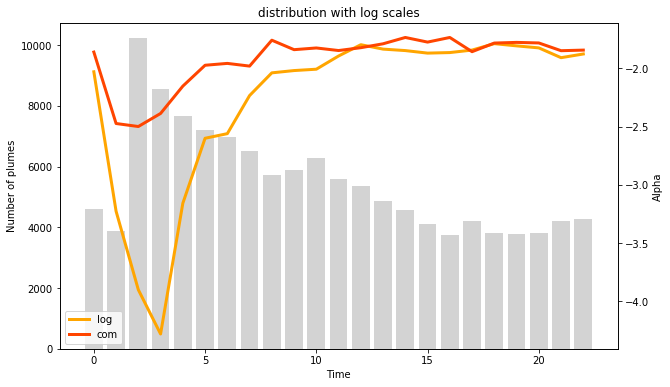

In [3]:
import numpy as np
from importlib import reload
import pandas as pd
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)
import matplotlib.pyplot as plt

bin_n     = 150
bin_min   = 10
bin_max   = 750
min_pixel = 4

plumes_time_area = prop_plumes[['time','sq Area']]
#del(prop_plumes)
plumes_time_area = plumes_time_area.loc[plumes_time_area['sq Area']<25600]

time, n_plumes, slope_lin, slope_log, slope_com = plot_plume_alpha(plumes_time_area,bin_n,bin_min,bin_max,min_pixel,n_plume_min=500)

axes = plt
axes.figure(figsize=(10,6))
axes.bar(time, n_plumes, color='lightgrey')
axes.xlabel('Time')
axes.ylabel('Number of plumes')
axes.title('distribution with log scales')

axes2 = axes.twinx()

axes2.set_ylabel('Alpha')
#axes2.plot(time, slope_lin, linewidth=3, color='gold', label='lin')
axes2.plot(time, slope_log, linewidth=3, color='orange', label='log')
axes2.plot(time, slope_com, linewidth=3, color='orangered', label='com')

plt.legend()
plt.savefig('log_com_slopes_plumes_20160830.png')

5 th percentile ->  106.1 m
95 th percentile ->  567.9 m


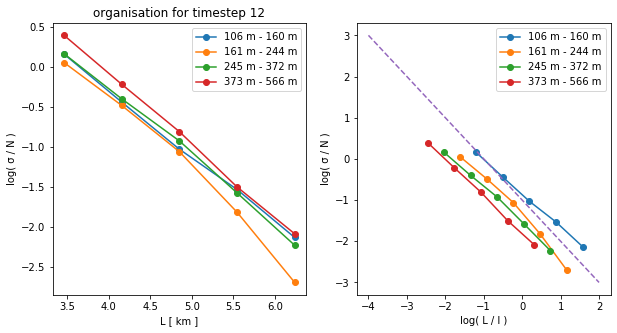

CPU times: user 1.02 s, sys: 4 ms, total: 1.02 s
Wall time: 1.02 s


In [33]:
%%time
import numpy as np
from importlib import reload
import organisation
from organisation import *
reload(organisation)
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

subdomains = [2,4,8,16,32]  #number of subdomains in both x and y-axis
n_bins = 4                  #number of bins which devide the whole plume size range
log_binning = True
inbetween_subs = True

domain_size = 1024

percentile = True           #if set to False min_size and max_size will be used as boundaries for the size distribution
lower_percentile = 5
upper_percentile = 95
min_size = 25
max_size = 500

prop_plumes = prop_plumes[['time','sq Area','x','y']]
prop_plumes = prop_plumes.loc[prop_plumes['sq Area']<25600]

plume_time  = np.unique(prop_plumes['time'])
time_vector = [12]#range(len(plume_time))        #time can be either the whole timespan or specific timesteps (time = [0,1,8,9])

center_x = []
center_y = []
size = []
for timestep in range(len(plume_time)):
    center_x.append(prop_plumes['x'].loc[prop_plumes['time']==plume_time[timestep]])
    center_y.append(prop_plumes['y'].loc[prop_plumes['time']==plume_time[timestep]])
    size.append(prop_plumes['sq Area'].loc[prop_plumes['time']==plume_time[timestep]])

if percentile:
    min_size = np.percentile((prop_plumes['sq Area']), lower_percentile)
    print(lower_percentile,'th percentile -> ',np.round(min_size,1),'m')
    max_size = np.percentile((prop_plumes['sq Area']), upper_percentile)
    print(upper_percentile,'th percentile -> ',np.round(max_size,1),'m')

f = variability(center_x, center_y, size, time_vector, domain_size, subdomains, n_bins, min_size, max_size, log_binning=True, inbetween_subs=True, show_subs=False)
#plt.savefig('organisation_plumes_20160830.png')
plt.show()

In [63]:
#xxx = np.asarray(xxx)
np.unique(prop_plumes['time'])

array(['2020-01-01T06:30:00.000000000', '2020-01-01T07:00:00.000000000',
       '2020-01-01T07:30:00.000000000', '2020-01-01T08:00:00.000000000',
       '2020-01-01T08:30:00.000000000', '2020-01-01T09:00:00.000000000',
       '2020-01-01T09:30:00.000000000', '2020-01-01T10:00:00.000000000',
       '2020-01-01T10:30:00.000000000', '2020-01-01T11:00:00.000000000',
       '2020-01-01T11:30:00.000000000', '2020-01-01T12:00:00.000000000',
       '2020-01-01T12:30:00.000000000', '2020-01-01T13:00:00.000000000',
       '2020-01-01T13:30:00.000000000', '2020-01-01T14:00:00.000000000',
       '2020-01-01T14:30:00.000000000', '2020-01-01T15:00:00.000000000',
       '2020-01-01T15:30:00.000000000', '2020-01-01T16:00:00.000000000',
       '2020-01-01T16:30:00.000000000', '2020-01-01T17:00:00.000000000',
       '2020-01-01T17:30:00.000000000'], dtype='datetime64[ns]')